In [10]:
import os
import collections


import powerlaw
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import warnings
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from datetime import date
sns.set()
warnings.filterwarnings("ignore")

# Powerlaw test for network

In [2]:
timeWindow = [1,3, 7]

In [19]:
selectedNetwork = pd.read_csv("dataset/networkiconomi.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')

In [3]:
selectedNetwork

,from,to,date,value
0,12136,4279,2017-10-04 05:51:11,54353471
1,37681,37682,2017-07-14 18:06:01,13840000
2,27652,27653,2017-10-14 06:17:12,100000000
3,25037,35753,2017-07-31 07:48:05,171000
4,17,23239,2017-07-30 12:53:51,933615
...,...,...,...,...
80332,17,17657,2017-08-17 10:35:18,99900
80333,17,8533,2018-01-07 06:32:16,19455000
80334,17,2205,2018-02-10 14:40:15,25970000
80335,35307,35308,2017-08-17 19:31:40,869999


In [12]:
for timeFrame in timeWindow:
    print("\nProcessing Timeframe{}".format(timeFrame))
    transactionGraphs = nx.DiGraph()
    # select only the rows that fall within the first 7 days
    start_date = selectedNetwork['date'].min()
    end_date = selectedNetwork['date'].max()
    #end_date = start_date + dt.timedelta(days=timeFrame)
    selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= start_date) & (selectedNetwork['date'] < end_date)]

    # Populate graph with edges
    for item in selectedNetworkInTimeFrame.to_dict(orient="records"):
        transactionGraphs.add_edge(item["from"], item["to"], value=item["value"])


NameError: name 'timeWindow' is not defined

In [20]:
transactionGraphs = nx.DiGraph()
# Populate graph with edges
for item in selectedNetwork.to_dict(orient="records"):
    transactionGraphs.add_edge(item["from"], item["to"], value=item["value"])
fit = powerlaw.Fit(list(dict(transactionGraphs.degree()).values()),estimate_discrete=False)
fit.power_law.alpha

Calculating best minimal value for power law fit


3.3369908016613934

In [56]:
unique_neighbor_counts = {}  # Dictionary to store node IDs and their unique neighbor counts

for node in transactionGraphs.nodes():
    neighbors = transactionGraphs.neighbors(node)  # Get neighbors of the current node
    unique_neighbors = set(neighbors)  # Convert to a set to get unique neighbors
    unique_neighbor_counts[node] = len(unique_neighbors)  # Count unique neighbors

unique_neighbor_counts

{16037: 2,
 245854: 2,
 17: 10206,
 237348: 1,
 206254: 1,
 194319: 20590,
 256098: 1,
 256097: 1,
 184024: 1,
 227746: 1,
 247616: 1,
 247617: 0,
 113477: 2,
 206322: 1,
 244638: 2,
 244640: 1,
 222636: 1,
 204146: 1,
 204147: 1,
 251758: 0,
 214268: 1,
 214269: 1,
 238266: 1,
 233423: 26,
 32401: 1,
 49: 1766,
 219909: 7,
 194337: 636,
 217001: 1,
 226051: 0,
 38696: 0,
 200891: 1,
 227963: 1,
 228944: 1,
 228945: 1,
 234170: 6,
 204380: 6,
 205729: 1,
 201564: 26,
 208295: 1,
 208296: 0,
 89654: 0,
 247997: 1,
 247998: 1,
 241449: 1,
 218899: 4,
 219244: 1,
 221221: 1,
 215525: 1,
 251048: 1,
 251049: 0,
 257489: 1,
 246988: 1,
 226616: 1,
 250958: 6,
 251366: 1,
 196058: 1,
 238316: 1,
 250889: 1,
 201901: 0,
 220536: 0,
 226152: 1,
 229104: 1,
 208538: 0,
 221489: 1,
 199477: 172,
 227180: 0,
 200451: 2,
 251391: 1,
 233927: 69,
 206588: 1,
 213412: 1,
 227752: 1,
 215428: 1,
 237287: 1,
 256500: 1,
 257441: 0,
 6866: 1,
 244357: 0,
 226675: 1,
 216501: 1,
 257135: 1,
 253710: 1,


In [58]:
unique_dict = dict(unique_neighbor_counts)
unique = pd.DataFrame(list(unique_dict.items()),columns=['Node','Unique'])
unique

,Node,Unique
0,16037,2
1,245854,2
2,17,10206
3,237348,1
4,206254,1
...,...,...
66932,195367,0
66933,204068,0
66934,251188,0
66935,19526,0


# Unique neighbour

In [62]:
fit = powerlaw.Fit(list(unique["Unique"]),estimate_discrete=False)
fit.power_law.xmin

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


7.0

In [6]:
fit = powerlaw.Fit(list(dict(transactionGraphs.degree()).values()),estimate_discrete=False)
fit.power_law.alpha

Calculating best minimal value for power law fit


4.438743718221196

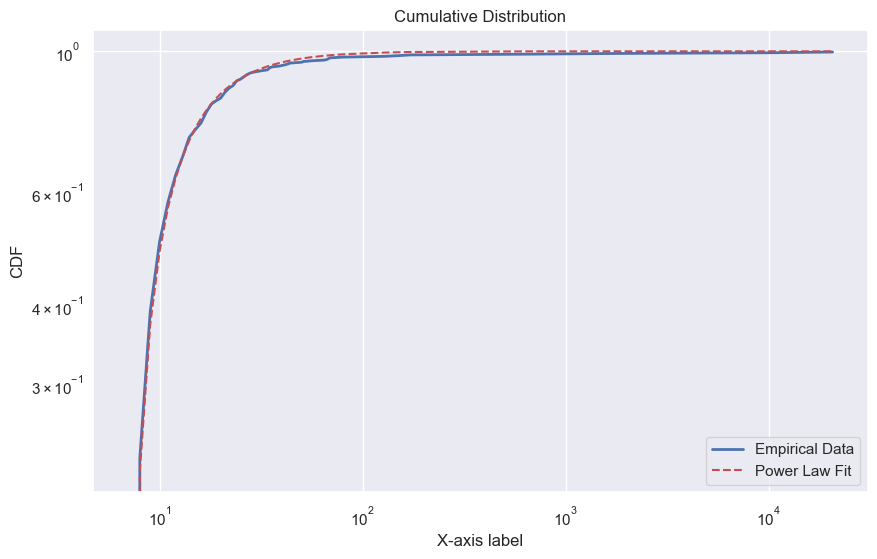

In [63]:
plt.figure(figsize=(10, 6))
fit.plot_cdf(color='b', linewidth=2,label='Empirical Data')
fit.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('X-axis label')
plt.ylabel('CDF')
plt.title('Cumulative Distribution')
plt.legend()
plt.show()

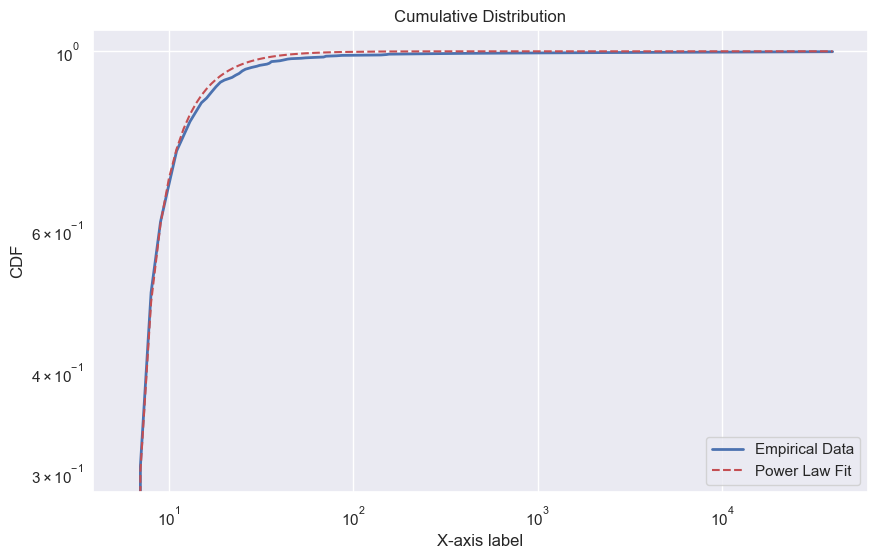

In [39]:
plt.figure(figsize=(10, 6))
fit.plot_cdf(color='b', linewidth=2,label='Empirical Data')
fit.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('X-axis label')
plt.ylabel('CDF')
plt.title('Cumulative Distribution')
plt.legend()
plt.show()

In [40]:
print(fit.power_law.alpha)
print(fit.power_law.xmin)
print(fit.distribution_compare('power_law', 'exponential'))

3.333564827541705
6.0
(2453.841385617937, 2.1943554718919792e-05)


In [65]:
fit.power_law.alpha

2.859252602257585

In [66]:
fit.power_law.xmin

7.0

In [67]:
fit.distribution_compare('power_law', 'exponential')[0]

1029.765783008109

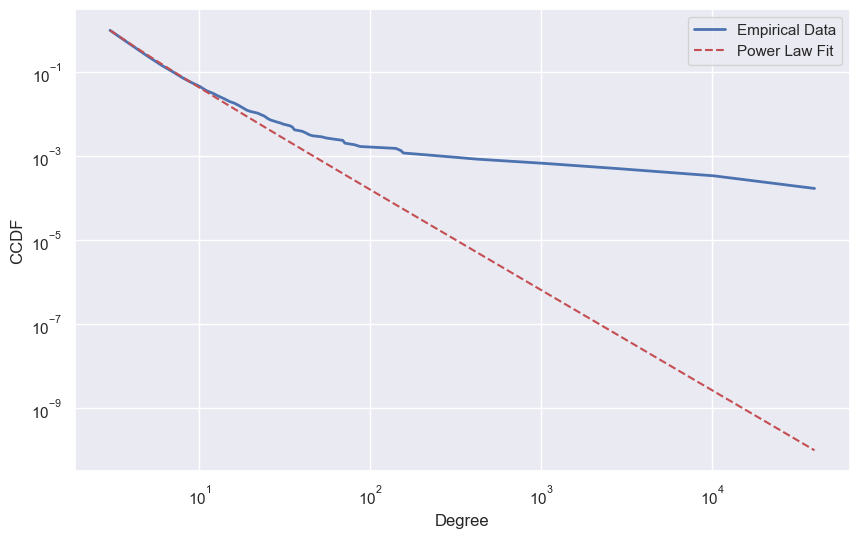

In [55]:
# Probability plot
plt.figure(figsize=(10, 6))
fit.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


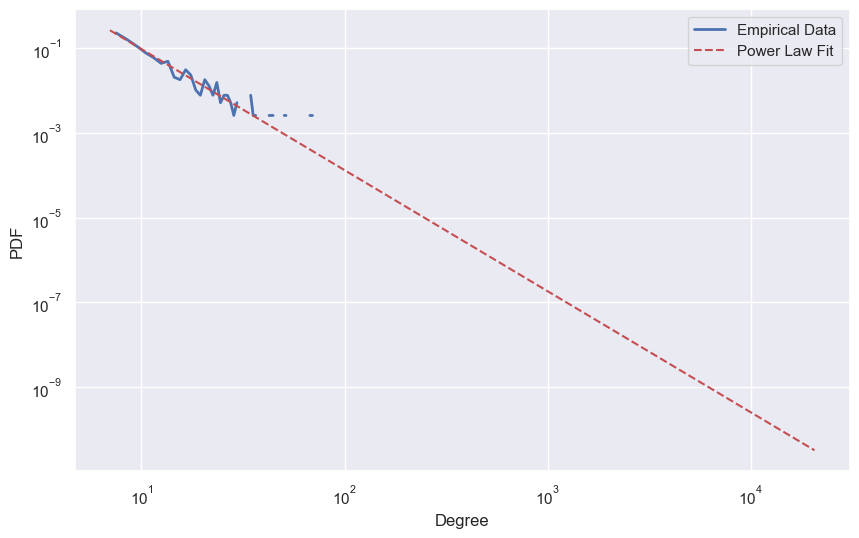

In [64]:
# PDF plot
plt.figure(figsize=(10, 6))
fit.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

M 

# Degree definition

In [12]:
G = nx.DiGraph()

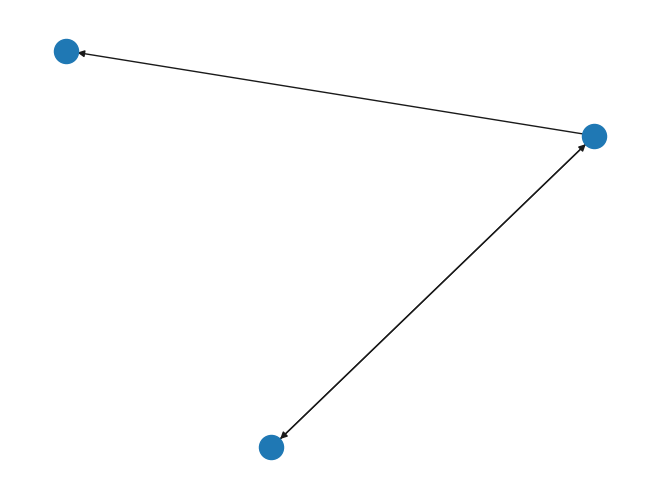

In [22]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2)
G.add_edge(2,1)
G.add_edge(1,3)
nx.draw(G)

# BA

In [42]:
BA_graph = nx.barabasi_albert_graph(20000,10)
BA_degrees = pd.DataFrame(BA_graph.degree(),columns=['Node','Degree'])
BA_degrees

,Node,Degree
0,0,585
1,1,374
2,2,102
3,3,508
4,4,481
...,...,...
19995,19995,10
19996,19996,10
19997,19997,10
19998,19998,10


In [26]:
degree_sequence_BA = sorted([d for n, d in BA_graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount_BA = collections.Counter(degree_sequence_BA)
deg, cnt = zip(*degreeCount.items())

degreeCount_BA

Counter({654: 1,
         630: 1,
         619: 1,
         601: 1,
         600: 1,
         576: 1,
         573: 1,
         564: 1,
         561: 1,
         538: 1,
         520: 1,
         450: 1,
         430: 1,
         428: 1,
         418: 1,
         410: 1,
         384: 1,
         369: 1,
         361: 1,
         354: 1,
         336: 1,
         329: 1,
         325: 1,
         321: 1,
         318: 1,
         313: 1,
         307: 1,
         301: 1,
         296: 1,
         278: 1,
         275: 1,
         268: 1,
         258: 1,
         257: 2,
         251: 1,
         244: 1,
         241: 1,
         232: 1,
         224: 4,
         221: 1,
         219: 1,
         217: 1,
         215: 1,
         214: 2,
         213: 1,
         210: 1,
         209: 1,
         208: 2,
         204: 3,
         203: 1,
         202: 2,
         201: 1,
         200: 1,
         199: 1,
         197: 2,
         196: 1,
         194: 1,
         192: 1,
         191: 

In [49]:
fit_BA = powerlaw.Fit(BA_degrees['Degree'])

Calculating best minimal value for power law fit


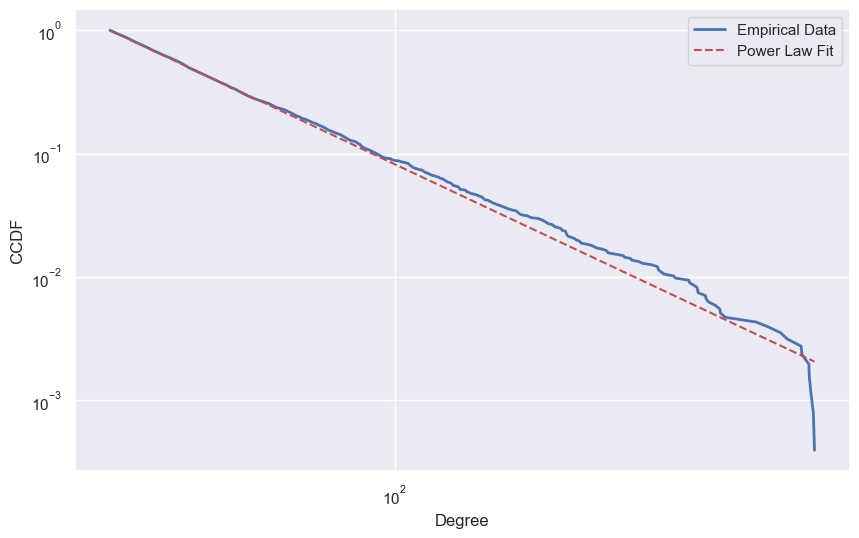

In [50]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_ccdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_ccdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.legend()
plt.show()


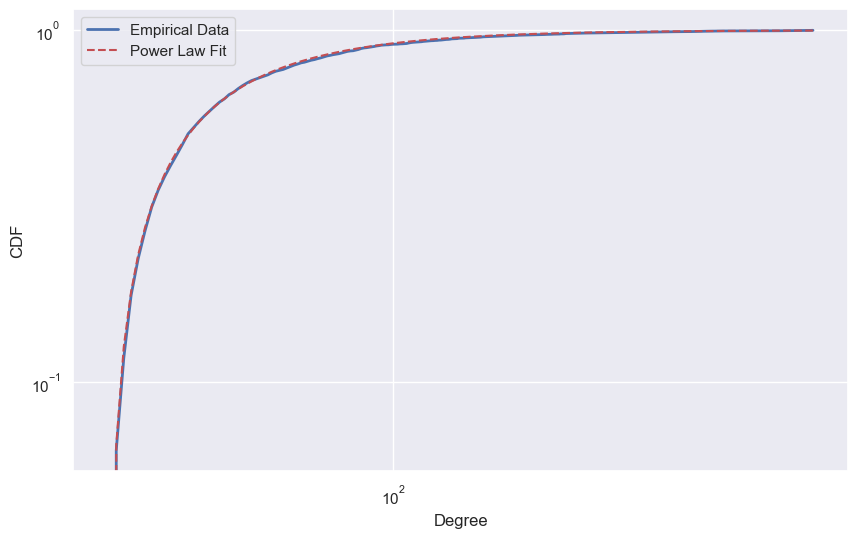

In [51]:
# Probability plot
plt.figure(figsize=(10, 6))
fit_BA.plot_cdf(color='b', linewidth=2, label='Empirical Data')
fit_BA.power_law.plot_cdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('CDF')
plt.legend()
plt.show()

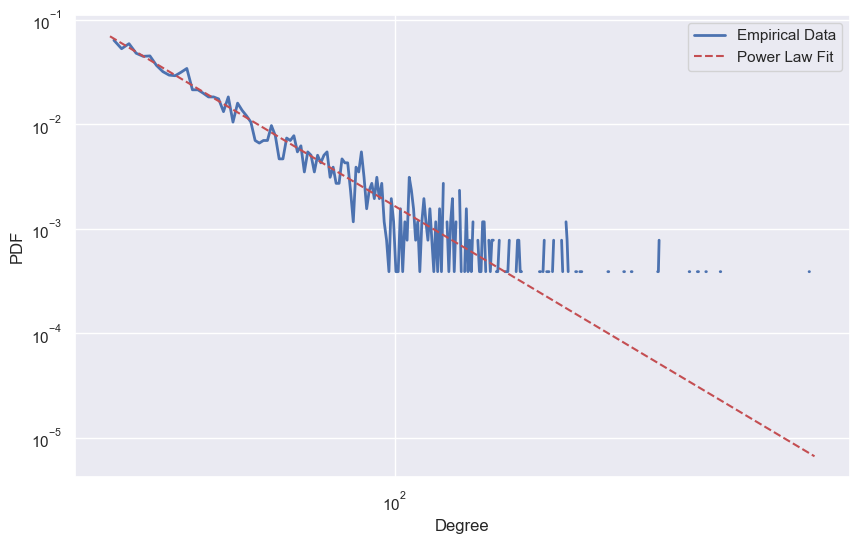

In [52]:
plt.figure(figsize=(10, 6))
fit_BA.plot_pdf(color='b', linewidth=2, label='Empirical Data',linear_bins=True)
fit_BA.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca(), label='Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()
plt.show()

In [53]:
fit_BA.power_law.alpha

3.0220265245748896

In [54]:
fit_BA.power_law.xmin

29.0

In [55]:
fit_BA.distribution_compare('power_law', 'exponential')[0]

474.0568687336261

# Daily transaction network

In [146]:
selectedNetwork = pd.read_csv("dataset/networkcentra.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
30943,1937660,1765138,2017-08-01,250000000000000000000
79171,1937660,1765138,2017-08-01,250000000000000000000
13306,1944968,1924395,2017-08-05,72000000000000000000
1257,1944968,1930353,2017-08-05,30000000000000000000
14570,1931184,1944968,2017-08-05,100000000000000000000
...,...,...,...,...
69846,82,1918043,2018-05-06,965000000000000000000
71530,82,1918044,2018-05-06,56880000000000000000000
26246,1918044,26,2018-05-06,56880000000000000000000
45769,26,1681146,2018-05-06,227055000000000000000000


# Daily transaction network ( no growing)

In [147]:
currDate = selectedNetwork['date'].min()
transactionGraphs = nx.DiGraph()
score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []
for index, row in selectedNetwork.iterrows():
    if(row['date'] != currDate ):
        row_df = []
        
        degrees = list(dict(transactionGraphs.degree()).values())
        fit = powerlaw.Fit(degrees)
        row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
        row_df.append(transactionGraphs.number_of_nodes())
        row_df.append(fit.power_law.xmin)
        row_df.append(fit.power_law.alpha)
        row_df.append(currDate)
        
        currDate = row['date']
        
        row_list.append(row_df)
        transactionGraphs = nx.DiGraph()
    else:
        transactionGraphs.add_edge(row["from"], row["to"], value=row["value"])
df_power_law = pd.DataFrame(row_list,columns= column)    
df_power_law

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

,score,#nodes,xmin,alpha,date
0,0.000000,2,NaN,NaN,2017-08-01
1,215.194024,97,1.0,13.248470,2017-08-05
2,2.560811,55,2.0,6.318875,2017-08-06
3,48.004011,36,1.0,9.531801,2017-08-07
4,2.605469,9,1.0,13.984255,2017-08-08
...,...,...,...,...,...
270,95.784726,77,1.0,6.016439,2018-05-01
271,140.481123,106,1.0,6.152657,2018-05-02
272,2162.777585,693,1.0,25.045473,2018-05-03
273,167.826249,115,1.0,6.629240,2018-05-04


In [149]:
df_power_law.to_csv("result_dataset\power_law_result_centra.csv")

# Split data for training and testing

In [2]:
df_power_law = pd.read_csv("result_dataset\power_law_aragon_df.csv")
df_power_law['date'] = pd.to_datetime(df_power_law['date'])
df_power_law['date'] = df_power_law['date'].dt.date
threshold = df_power_law['date'].min() + (df_power_law['date'].max() - df_power_law['date'].min()  ) * 0.8
    
trainNetwork = df_power_law[df_power_law['date'] <= threshold]
testNetwork = df_power_law[df_power_law['date'] > threshold]
df_power_law

,Unnamed: 0,score,#nodes,xmin,alpha,date
0,0,352.485706,994,2.0,12.170694,2017-05-17
1,1,292.332274,915,2.0,8.889134,2017-05-18
2,2,135.044127,478,2.0,6.782091,2017-05-19
3,3,962.766475,467,1.0,12.657813,2017-05-20
4,4,88.082791,310,2.0,6.552929,2017-05-21
...,...,...,...,...,...,...
349,349,26.473745,109,2.0,6.039715,2018-05-01
350,350,36.190116,112,2.0,6.268952,2018-05-02
351,351,84.086900,170,2.0,8.485789,2018-05-03
352,352,59.322974,149,2.0,9.059328,2018-05-04


# Split data for stable state

In [18]:
df_power_law = pd.read_csv("result_dataset\power_law_aragon_df.csv")
df_power_law['date'] = pd.to_datetime(df_power_law['date'])
df_power_law['date'] = df_power_law['date'].dt.date
threshold = pd.to_datetime('2018-03-01')
print(threshold)
trainNetwork = df_power_law[df_power_law['date'] <= threshold]
testNetwork = df_power_law[df_power_law['date'] > threshold]

2018-03-01 00:00:00


In [19]:
testNetwork

,Unnamed: 0,score,#nodes,xmin,alpha,date
289,289,52.510836,170,2.0,4.574004,2018-03-02
290,290,109.671078,238,2.0,6.377133,2018-03-03
291,291,48.766101,139,2.0,6.340835,2018-03-04
292,292,205.491762,351,2.0,8.782498,2018-03-05
293,293,126.787400,205,2.0,7.950499,2018-03-06
...,...,...,...,...,...,...
349,349,26.473745,109,2.0,6.039715,2018-05-01
350,350,36.190116,112,2.0,6.268952,2018-05-02
351,351,84.086900,170,2.0,8.485789,2018-05-03
352,352,59.322974,149,2.0,9.059328,2018-05-04


In [8]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_power_law['date'], y=df_power_law['score'], mode='lines', name='Line'))
# fig.add_trace(go.Scatter(x=df_power_law['#nodes'], y=df_power_law['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [21]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=trainNetwork['#nodes'], y=trainNetwork['alpha'], mode='lines', name='Line',line=dict(width=1,color='blue')))
fig.add_trace(go.Scatter(x=trainNetwork['#nodes'], y=trainNetwork['alpha'], mode='markers', name='Scatter',line=dict(color='red')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='lines', name='Line',line=dict(width=1,color='grey')))
fig.add_trace(go.Scatter(x=testNetwork['#nodes'], y=testNetwork['alpha'], mode='markers', name='Scatter',line=dict(color='green')))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Aragon\'s Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

# Daily transaction network ( growing network)

In [62]:
currDate = selectedNetwork['date'].min()
transactionGraphs = nx.DiGraph()
score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []
for index, row in selectedNetwork.iterrows():
    if(row['date'] != currDate ):
        row_df = []
        
        degrees = list(dict(transactionGraphs.degree()).values())
        fit = powerlaw.Fit(degrees)
        row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
        row_df.append(transactionGraphs.number_of_nodes())
        row_df.append(fit.power_law.xmin)
        row_df.append(fit.power_law.alpha)
        row_df.append(currDate)
        
        currDate = row['date']
        
        row_list.append(row_df)
#         transactionGraphs = nx.DiGraph()
    else:
        transactionGraphs.add_edge(row["from"], row["to"], value=row["value"])
df_power_law_cumu = pd.DataFrame(row_list,columns= column)    
df_power_law_cumu

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


,score,#nodes,xmin,alpha,date
0,352.485706,994,2.0,12.170694,2017-05-17
1,137.154872,1780,3.0,5.306435,2017-05-18
2,176.236381,2144,3.0,5.202704,2017-05-19
3,209.934271,2507,3.0,4.538917,2017-05-20
4,238.614482,2720,3.0,4.728492,2017-05-21
...,...,...,...,...,...
349,2429.245392,66587,6.0,3.325615,2018-05-01
350,2432.459470,66639,6.0,3.326995,2018-05-02
351,2436.457069,66725,6.0,3.329072,2018-05-03
352,2436.377777,66796,6.0,3.327490,2018-05-04


In [63]:
df_power_law_cumu.to_csv("power_law_aragon_df_cumu.csv")

In [10]:
df_power_law_cumu_read = pd.read_csv("power_law_aragon_df_cumu.csv")
df_power_law_cumu_read = df_power_law_cumu_read.drop('Unnamed: 0',axis=1)
df_power_law_cumu_read

,score,#nodes,xmin,alpha,date
0,352.485706,994,2.0,12.170694,2017-05-17
1,137.154872,1780,3.0,5.306435,2017-05-18
2,176.236381,2144,3.0,5.202704,2017-05-19
3,209.934271,2507,3.0,4.538917,2017-05-20
4,238.614482,2720,3.0,4.728492,2017-05-21
...,...,...,...,...,...
349,2429.245392,66587,6.0,3.325615,2018-05-01
350,2432.459470,66639,6.0,3.326995,2018-05-02
351,2436.457069,66725,6.0,3.329072,2018-05-03
352,2436.377777,66796,6.0,3.327490,2018-05-04


In [12]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_power_law_cumu_read['date'], y=df_power_law_cumu_read['score'], mode='lines', name='Line'))



# Customize the layout
fig.update_layout(
    title=dict(
        text='Comparision score to exponential distribution',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=800
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [110]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_power_law_cumu_read['#nodes'], y=df_power_law_cumu_read['alpha'], mode='lines', name='Line',line=dict(width=1)))
fig.add_trace(go.Scatter(x=df_power_law_cumu_read['#nodes'], y=df_power_law_cumu_read['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1500
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

# Sliding window

In [81]:
selectedNetwork = pd.read_csv("dataset/networkcindicator.txt", sep=' ', names=["from", "to", "date", "value"])
selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')
selectedNetwork = selectedNetwork.sort_values(by = 'date')
selectedNetwork['date'] = selectedNetwork['date'].dt.date
selectedNetwork

,from,to,date,value
22902,2005720,2005680,2017-09-10,13861
10068,2005720,2005680,2017-09-10,13861
37000,58966,2008655,2017-09-10,291830000000000000000000
42879,2005720,2009180,2017-09-11,300000000
29654,2005720,2009180,2017-09-11,3000000000000000000000000
...,...,...,...,...
1060,1992270,5,2018-05-06,140000000000000000000000
36792,1992271,1992272,2018-05-06,300000000000000000000000
27336,1992272,5,2018-05-06,300000000000000000000000
72599,1992249,1992273,2018-05-06,5017000000000000000000


In [82]:
def sliding_window_dates(start_date, end_date):
    # Initialize the sliding window
    
    window_end = start_date   # Initial window size is 3 days
    window_start = window_end - timedelta(days=6)
    
    # Slide the window through the date interval
    while window_end <= end_date:
        if(window_start >= start_date):
            yield (window_start, window_end)
        else:
            yield(start_date,window_end)
        
        # Slide the window by one day
        window_start += timedelta(days=1)
        window_end += timedelta(days=1)


start_date = selectedNetwork['date'].min()
end_date = selectedNetwork['date'].max()

score_list = []
column = ["score","#nodes","xmin","alpha","date"]
row_list = []

for window_start, window_end in sliding_window_dates(start_date, end_date):
    selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= window_start) & (selectedNetwork['date'] <= window_end)]
    transactionGraphs = nx.DiGraph()
    
    for index, row in selectedNetworkInTimeFrame.iterrows():
        transactionGraphs.add_edge(row["from"], row["to"], value=row["value"])
    row_df = []
        
    degrees = list(dict(transactionGraphs.degree()).values())
    fit = powerlaw.Fit(degrees)
    row_df.append(fit.distribution_compare('power_law', 'exponential')[0])
    row_df.append(transactionGraphs.number_of_nodes())
    row_df.append(fit.power_law.xmin)
    row_df.append(fit.power_law.alpha)
    row_df.append(window_end)
    row_list.append(row_df)

df_sliding = pd.DataFrame(row_list,columns= column)  

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits found.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Not enough data. Returning nan
No valid fits fou

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [78]:
df_sliding.to_csv("result_dataset\power_law_result_cindicator_7.csv")

In [7]:
start_date = selectedNetwork['date'].min()
selectedNetworkInTimeFrame = selectedNetwork[
        (selectedNetwork['date'] >= start_date ) & (selectedNetwork['date'] <= start_date + timedelta(days=2) )]
selectedNetworkInTimeFrame

,from,to,date,value
49133,250733,248773,2017-05-17,135918900000000000000
110195,254519,248578,2017-05-17,4800000000000000000000
105736,51586,255124,2017-05-17,150000000000000000000
12305,38556,255135,2017-05-17,100000000000000000000
88428,254797,255142,2017-05-17,1470000000000000000000
...,...,...,...,...
21605,17,252620,2017-05-19,132353200000000000000
77216,240205,240130,2017-05-19,10000000000000000000
29721,74720,49,2017-05-19,12001500000000000000000
46459,252620,49,2017-05-19,132353200000000000000


In [8]:
df_sliding = pd.read_csv("power_law_sliding.csv",index_col=False)
df_sliding

,Unnamed: 0,score,#nodes,xmin,alpha,date
0,0,352.485706,994,2.0,12.170694,2017-05-17
1,1,137.154872,1782,3.0,5.306435,2017-05-18
2,2,175.753708,2147,3.0,5.177486,2017-05-19
3,3,604.462878,1693,2.0,8.106353,2017-05-20
4,4,360.630196,1145,2.0,7.144668,2017-05-21
...,...,...,...,...,...,...
350,350,144.733121,314,2.0,9.018816,2018-05-02
351,351,194.916129,382,2.0,9.644538,2018-05-03
352,352,252.659690,414,2.0,11.716505,2018-05-04
353,353,280.437310,427,2.0,13.549411,2018-05-05


In [83]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='lines', name='Line',line=dict(width=1)))
fig.add_trace(go.Scatter(x=df_sliding['#nodes'], y=df_sliding['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Cindicator\'s Trajectory (Sliding windows)',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=1000
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [10]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df_sliding['date'], y=df_sliding['score'], mode='lines', name='Line'))



# Customize the layout
fig.update_layout(
    title=dict(
        text='Comparision score to exponential distribution',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='date'),
    yaxis=dict(title='score'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=800
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

In [5]:
min_alpha = df_power_law["alpha"].min()
for index, row in df_power_law.iterrows():
    if(row["alpha"] == min_alpha):print( index,row["#nodes"])

51 288


In [4]:
short_df = df_power_law.tail(354 - 51)
short_df

NameError: name 'df_power_law' is not defined

In [12]:
short_df = df_power_law.tail(354 - 51)
column = ["#nodes","alpha","date"]
row_list = []
nodes_min = 0
alpha_min = 0
for index, row in short_df.iterrows():
    if(row["#nodes"] > nodes_min and row["alpha"]> alpha_min):
        nodes_min = row["#nodes"]
        alpha_min = row["alpha"]
        row_df = []
        row_df.append(row["#nodes"])
        row_df.append(row["alpha"])
        row_df.append(row["date"])
        row_list.append(row_df)
short_df = pd.DataFrame(row_list,columns=column)
short_df

,#nodes,alpha,date
0,288,1.929667,2017-07-07
1,335,4.399217,2017-07-10
2,602,6.289966,2017-07-11
3,695,9.189600,2017-08-10
4,725,10.013321,2017-08-11
5,753,11.788915,2017-11-27
6,770,15.826376,2017-11-29


In [8]:
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=short_df['#nodes'], y=short_df['alpha'], mode='lines', name='Line',line=dict(width=1)))
fig.add_trace(go.Scatter(x=short_df['#nodes'], y=short_df['alpha'], mode='markers', name='Scatter'))


# Customize the layout
fig.update_layout(
    title=dict(
        text='Trajectory',  # Set the title here
        x=0.5,  # Center the title horizontally (0.5 means middle)
        y=0.95,  # Adjust the vertical position as needed (0.95 is near the top)
    ),
    xaxis=dict(title='#nodes'),
    yaxis=dict(title='alpha'),
    paper_bgcolor='white',  # Set the background color to white
    plot_bgcolor='white',   # Set the plot area background color to white
    width=500
    
)

fig.update_xaxes(linecolor='black')
fig.update_yaxes(linecolor='black')
fig.update_traces(showlegend=False)
# Show the plot
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


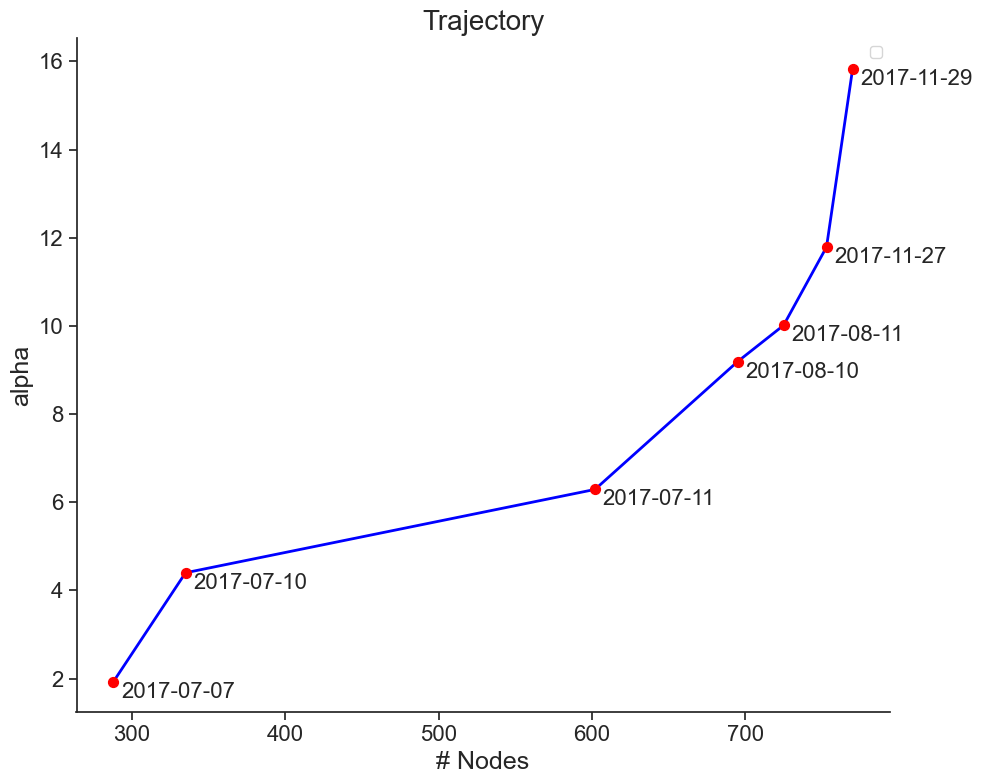

In [40]:
plt.figure(figsize=(10, 8))  # Set the figure size

plt.plot(short_df['#nodes'], short_df['alpha'],linewidth=2, markersize=12,color='blue')
plt.scatter(short_df['#nodes'], short_df['alpha'], color = 'red',s=50,marker='o',zorder = 2)

for i in range(7):
    plt.text(short_df['#nodes'][i]+5, short_df['alpha'][i], short_df['date'][i], ha='left', va='top',fontsize = 16)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('# Nodes', fontsize=18)
plt.ylabel('alpha', fontsize=18)
plt.title("Trajectory",fontsize=20)
sns.set_style('ticks')

sns.despine()

plt.tight_layout()
plt.legend()
plt.savefig("Trajectory.png",dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


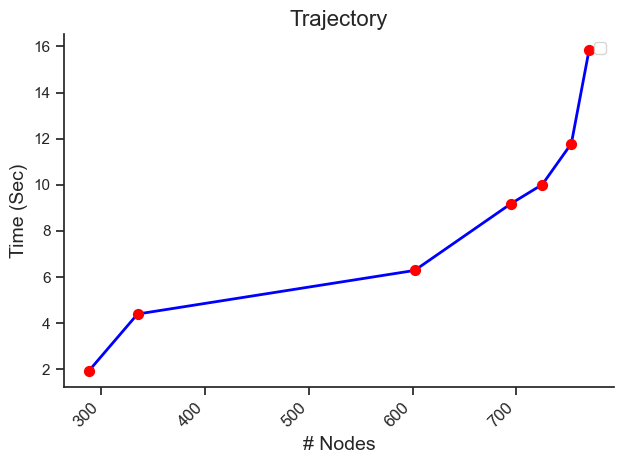

In [16]:
# plt.figure(figsize=(10, 8))  # Set the figure size

plt.plot(short_df['#nodes'], short_df['alpha'],linewidth=2, markersize=12,color='blue')
plt.scatter(short_df['#nodes'], short_df['alpha'], color = 'red',s=50,marker='o',zorder = 2)


plt.xticks(fontsize=12, rotation=45, ha='right')

plt.xlabel('# Nodes', fontsize=14)
plt.ylabel('Time (Sec)', fontsize=14)
plt.title("Trajectory",fontsize=16)

sns.set_style('ticks')

sns.despine()

plt.tight_layout()
plt.legend()
plt.show()

In [57]:
min_node = df_power_law["#nodes"].min()
for index, row in df_power_law.iterrows():
    if(row["#nodes"] == min_node):print( index,row["alpha"])

325 3.704159976642952


In [58]:
short_df = df_power_law.tail(354 - 325)
column = ["#nodes","alpha","date"]
row_list = []
nodes_min = 0
alpha_min = 0
for index, row in short_df.iterrows():
    if(row["#nodes"] > nodes_min and row["alpha"]> alpha_min):
        nodes_min = row["#nodes"]
        alpha_min = row["alpha"]
        row_df = []
        row_df.append(row["#nodes"])
        row_df.append(row["alpha"])
        row_df.append(row["date"])
        row_list.append(row_df)
short_df = pd.DataFrame(row_list,columns=column)
short_df

,#nodes,alpha,date
0,64,3.704160,2018-04-07
1,80,5.898927,2018-04-08
2,124,6.211494,2018-04-13
3,145,7.992662,2018-04-19
4,182,10.335046,2018-04-24
